In [1]:
import math
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE

import Acquire as a
import Prepare as p

## Acquiring Our Dataframe

In [2]:
df = a.get_texas_data() ## using acquire function to pull down our csv into pandas

df.head() ## previewing dataframe

,AGY,NAME,LASTNAME,FIRSTNAME,MI,JOBCLASS,JC TITLE,RACE,SEX,EMPTYPE,...,RATE,HRSWKD,MONTHLY,ANNUAL,STATENUM,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,101,SENATE ...,GILLIAM,STACEY,L,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,8100.0,97200.0,339371,True,NaN,NaN,181200.0,NaN
1,104,LEGISLATIVE BUDGET BOARD ...,GILLIAM,STACEY,L,C160,COMMITTEE DIRECTOR ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,7000.0,84000.0,339371,True,NaN,NaN,NaN,True
2,101,SENATE ...,NELSON,DAVID,,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,9500.0,114000.0,193187,True,NaN,NaN,210000.0,NaN
3,104,LEGISLATIVE BUDGET BOARD ...,NELSON,DAVID,,P080,SENIOR BUDGET ADVISOR ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,8000.0,96000.0,193187,True,NaN,NaN,NaN,True
4,101,SENATE ...,ROCHA,MARIE,S,7103,LEG. SERVICE/MAINTENANCE ...,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,...,0.0,41.0,3365.4,40384.8,152257,True,NaN,True,NaN,NaN


## Preparing Our Dataframe

In [3]:
## using our prepare function to clean strings, and drop nulls and duplicate

df = p.prepare_tex(df)

df.head() ## previewing dataframe

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,8100.0,97200.0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,7000.0,84000.0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,9500.0,114000.0
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,8000.0,96000.0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,3365.4,40384.8


In [4]:
df = p.create_features(df)

In [5]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,annual_salary,is_female,is_white,is_hispanic,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,...,97200.0,1,1,0,0,0,5,96,8.0,0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,84000.0,1,1,0,0,0,5,44,3.7,0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,...,114000.0,0,1,0,0,0,5,271,22.6,0
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,96000.0,0,1,0,0,0,5,44,3.7,0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,...,40384.8,1,0,1,0,1,3,218,18.2,0


In [6]:
df.is_white.value_counts()

0    80083
1    64647
Name: is_white, dtype: int64

In [7]:
df.is_female.value_counts()

1    82865
0    61865
Name: is_female, dtype: int64

In [8]:
df.is_BIPOC.value_counts()

1    80083
0    64647
Name: is_BIPOC, dtype: int64

In [9]:
df.is_elected.value_counts()

0    144456
1       274
Name: is_elected, dtype: int64

### Creating Bins For Years of Tenure

Looking At Our Maximum Age and Minimum Age to Make Some Age Bins

Max: 49.8, Min: 0.0

----------------------------

Visualizing Years of Tenure Column To Help with Binning



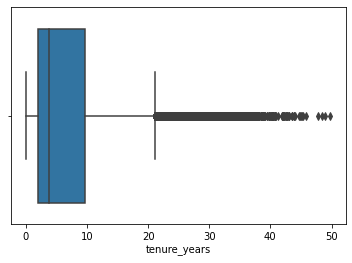


----------------------------

Looking At Our Years of Tenure Bins Value Counts
1    83012
2    27330
3    25513
4     8875
Name: tenure_years_bins, dtype: int64

----------------------------



In [10]:
df = p.make_bins_and_feats(df)

In [11]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected,tenure_years_bins,0-5_years,5-10_years,10-20_years,>20_years
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,...,0,5,96,8.0,0,2,0,1,0,0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,0,5,44,3.7,0,1,1,0,0,0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,...,0,5,271,22.6,0,4,0,0,0,1
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,0,5,44,3.7,0,1,1,0,0,0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,...,1,3,218,18.2,0,3,0,0,1,0


### Splitting Data

In [12]:
train, validate, test = p.split_data(df)

Making Sure Our Shapes Look Good
Train: (81048, 26), Validate: (34736, 26), Test: (28946, 26)


In [13]:
train.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected,tenure_years_bins,0-5_years,5-10_years,10-20_years,>20_years
125096,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,OKECHI,VICTOR,CORREC OFFICER IV,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-02-06,40.0,...,1,2,53,4.4,0,1,1,0,0,0
42845,529,HEALTH AND HUMAN SERVICES COMMISSION,EKRAM,NIDAA,PROGRAM SPECIALIST V,ASIAN,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-09-08,40.0,...,1,1,10,0.8,0,1,1,0,0,0
117530,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,ISIORHOVOJA,ANDREW,CORREC OFFICER IV,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-03-30,40.0,...,1,2,15,1.2,0,1,1,0,0,0
26227,405,DEPARTMENT OF PUBLIC SAFETY,NETT,ROBERT,"SERGEANT, DPS",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2009-09-27,40.0,...,0,5,141,11.8,0,3,0,0,1,0
113713,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,GARZA,AMANDA,PAROLE OFFCR II,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2016-08-15,40.0,...,1,3,59,4.9,0,1,1,0,0,0


In [14]:
validate.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected,tenure_years_bins,0-5_years,5-10_years,10-20_years,>20_years
144519,592,SOIL AND WATER CONSERVATION BOARD,KENNEDY,SHANNON,NETWORK SPEC II,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-10-23,40.0,...,1,2,44,3.7,0,1,1,0,0,0
84211,537,DEPARTMENT OF STATE HEALTH SERVICES,TANGALOS,REBECCA,MEDICAL TECHNOLOGIST IV,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2015-04-06,40.0,...,0,5,75,6.2,0,2,0,1,0,0
126534,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,PEGODA,CLIFFORD,MGR IV,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2001-12-06,40.0,...,0,5,235,19.6,0,3,0,0,1,0
99947,601,TEXAS DEPARTMENT OF TRANSPORTATION,WEST III,JOHN,TRANS MAINT SPEC IV,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2004-03-16,40.0,...,0,5,208,17.3,0,3,0,0,1,0
29847,405,DEPARTMENT OF PUBLIC SAFETY,WRIGHT,KEVIN,"SERGEANT, DPS",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,1999-09-27,40.0,...,0,5,261,21.8,0,4,0,0,0,1


In [15]:
test.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,is_BIPOC,race_encoded,tenure_months,tenure_years,is_elected,tenure_years_bins,0-5_years,5-10_years,10-20_years,>20_years
85971,582,TEXAS COMMISSION ON ENVIRONMENTAL QUALITY,JOHNSON,LAURA,NATURAL RESOURCES SPEC III,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2018-08-06,40.0,...,0,5,35,2.9,0,1,1,0,0,0
115287,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,HALIM,HARRIET,CORREC OFFCR III,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2021-05-17,40.0,...,1,2,1,0.1,0,1,1,0,0,0
82959,537,DEPARTMENT OF STATE HEALTH SERVICES,LARSEN,JANIE,PUBLIC HLTH & PRVNT SPEC III,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-02-01,40.0,...,1,3,53,4.4,0,1,1,0,0,0
137863,772,SCHOOL FOR THE DEAF,MILANI,CHRISTOPHE,FOOD SRVC MGR IV,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2019-10-15,40.0,...,0,5,21,1.8,0,1,1,0,0,0
120138,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,LETIGIO,VINCENT,CORREC OFFICER IV,ASIAN,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-11-06,40.0,...,1,1,44,3.7,0,1,1,0,0,0


## Exploring Our Dataframe

### Looking at Correlations

#### Heatmaps

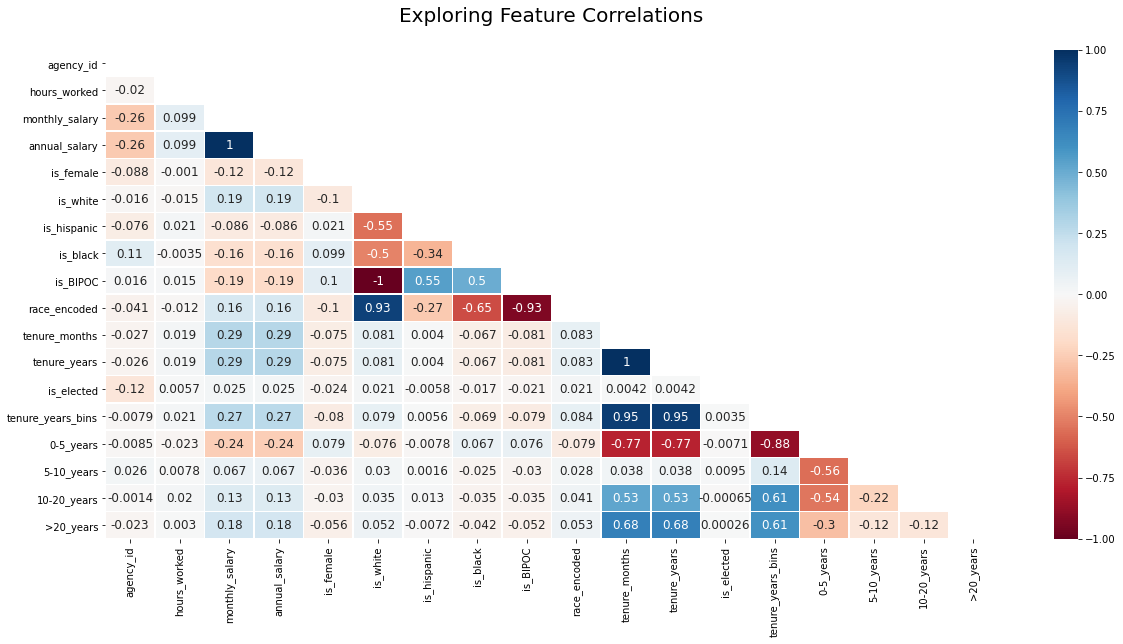

In [58]:
## defining correlation variable for heatmap
corr = train.corr()

## creating a heatmap of the correlation between all columns in our dataframe

plt.figure(figsize=(20,9))
mask = np.zeros_like(corr)  ## <-- creating a mask
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, center=0, annot=True, linewidths=.5, cmap='RdBu',
            annot_kws={"size": 12}, mask=mask)
plt.title('Exploring Feature Correlations\n', {'fontsize': 20})
plt.show()

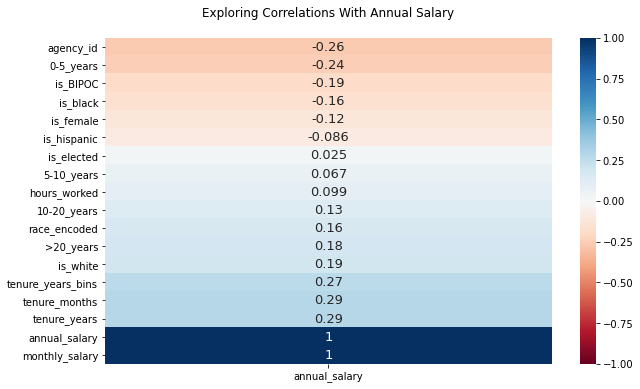

In [33]:
## Creating a heatmap showing correlations to our target variable

plt.figure(figsize = (10,6))  
sns.heatmap(train.corr()[['annual_salary']].sort_values(by='annual_salary', 
                                                        ascending = True), cmap = 'RdBu', 
            vmax = 1, vmin = -1, center = 0, 
            annot = True, annot_kws={"size": 13} )
plt.title('Exploring Correlations With Annual Salary\n')
plt.show()

### Pearson-R Correlation Testing
- Top Correlated Features
    - agency_id
    - 0-5 years
    - tenure_months
    - tenure_years_bins
    - tenure_years
    

In [51]:
alpha = 0.05 ## <-- Determining alpha value

Standard Hypothesis for correlation test of all variables

$H_0$ : There is no relationship between these variables

$H_a$ : There is evidence to suggest there is a realtionhip between these two variables

In [50]:
## performing correlation test on agency_id because the heat map showed
## a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train.agency_id, train.annual_salary)
corr, p

(-0.260989684266699, 0.0)

With a correlation of -0.26 and a p value less than our alpha 0.05 we can conclude that there is evidence to suggest there is a significant correlation between the agency id and the annual salary of a Texas government employee.

In [52]:
## performing correlation test on 0-5 years because the heat map showed
## a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train['0-5_years'], train.annual_salary)
corr, p

(-0.24415913095521297, 0.0)

With a correlation of -0.24 and a p value near 0 we can conclude that there is evidence to suggest there is a significant correlation between the employees that have 0 to 5 years of tenure and their annual salaries.

In [53]:
## performing correlation test on tenure in months because the heat map showed
## a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train['tenure_months'], train.annual_salary)
corr, p

(0.28509496814591595, 0.0)

With a correlation of 0.28 and a p value near 0 we can conclude that there is evidence to suggest there is a significant correlation between the employees tenure in months and their annual salaries

In [54]:
## performing correlation test on tenure in years because the heat map showed
## a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train['tenure_years'], train.annual_salary)
corr, p

(0.2851556967713695, 0.0)

With a correlation of 0.28 and a p value near 0 we can conclude that there is evidence to suggest there is a significant correlation between the employees tenure in years and their annual salaries

In [56]:
## performing correlation test on the tenure years bins because the heat map showed
## a good correlation value.

## Now we test it to determine if it is a significant relationship

corr, p = stats.pearsonr(train['tenure_years_bins'], train.annual_salary)
corr, p

(0.26952636562585924, 0.0)

With a correlation of 0.27 and a p value near 0 we can conclude that there is evidence to suggest there is a significant correlation between grouping employees into different tenure brackets (0-5 years, 5-10 years, 10-20 years, and more than 20 years) and their annual salary.

#### Pearson-R Correlation Testing: Takeaways

Features Tested with annual_salary
   * agency_id:                corr = -0.26
   * 0-5 years:               corr = -0.24
   * tenure_months:           corr = 0.29
   * tenure_years_bins:       corr = 0.27
   * tenure_years:            corr = 0.29

After running Person-R correlation test's on these top correlated features all of the test results returned p-value's near zero. Therefore we can conclude there is a signifcant correlation between these variables and look into using them in our models to improve model performance.

### Annual Salaries vs Different Subgroups